## PageRank

#### Описание

Введем понятие веб-графа. Ориентированный граф $G = (V, E)$ называется веб-графом, если 
* $V = \{url_i\}_{i=1}^n$ --- некоторое подмножество страниц в интернете, каждой из которых соответствует адрес $url_i$.
* Множество $E$ состоит из тех и только тех пар $(url_i, url_j)$, для которых на странице с адресом $url_i$ есть 
ссылка на $url_j$.

Рассмотрим следующую модель поведения пользователя. В начальный момент времени он выбирает некоторую страницу из $V$ в соответствии с некоторым распределением $\Pi^{(0)}$. Затем, находясь на некоторой странице, он может либо перейти по какой-то ссылке, которая размещена на этой странице, либо выбрать случайную страницу из $V$ и перейти на нее (damping factor). Считается, что если пользователь выбирает переход по ссылке, то он выбирает равновероятно любую ссылку с данной страницы и переходит по ней. Если же он выбирает переход не по ссылке, то он также выбирает равновероятно любую страницу из $V$ и переходит на ее (в частности может остаться на той же странице). Будем считать, что переход не по ссылке пользователь выбирает с некоторой вероятностью $p \in (0, 1)$. Соответственно, переход по ссылке он выбирает с вероятностью $1 - p$. Если же со страницы нет ни одной ссылки, то будем считать, что пользователь всегда выбирает переход не по ссылке.

Описанная выше модель поведения пользователя называется моделью PageRank. Нетрудно понять, что этой модели соответствует некоторая марковская цепь:
* Множество состояний: Это V. В каждый момент времени мы находимся на одной из веб-страниц
* Начальное распределение: $\Pi^{(0)}$
* Эта марковская цепь является однородной, т.к. распределение не зависит от времени. Обозначим  r - вектор, где   $r_i = \lbrace j $: с i-той можно перейти на j-тую $\rbrace$



$p_{i,j} = P(\xi_k = j$ | $\xi_{k - 1} = i) = P(\xi_k = j | \xi_{k - 1} = i$ | переходим по ссылке)$ \cdot$ P(переходим по ссылке) + $ P(\xi_k = j$ | $\xi_{k - 1} = i) \cdot $P(переходим просто в другую вершину)


$P(\xi_k = j $ | $ \xi_{k - 1} = i $| перешли по ссылке )$ = 
\begin{cases}  
    \frac{1}{r_i}, & \mbox{если с i-той есть ссылка на j-тую}  
    \\ 0, & \mbox{иначе}
\end{cases}$

$P(\xi_k = j $ | $ \xi_{k - 1} = i $| перешли в другую вершину)$ = \frac{1}{|V|}$

Не забываем, что если $|r_i| = 0 \Rightarrow $ мы обязательно переходим в другую вершину(не по ссылке)


#### Вычисление

Упорядочим (очевидно, упорядочение будет частичным) неразложимые классы отношением достижимости. Минимальные элементы в таком упорядочении называются эргодическими классами.
Эргодическая марковская цепь — марковская цепь, целиком состоящая из одного эргодического класса.
неразложимый класс будет аналогичен компоненте сильной связности.


Элемент a $\in$ M называется минимальным, если не существует элемента b < a


Данная марковская цепь является эргодической. Почему?

Наш граф имеет 1 компоненту сильной связности, т.к. $\forall i,j : p_{ij} \neq 0 \Rightarrow$ у нас все элементы сравнимы, значит, у нас всего один неразложимый класс, он и будет являться эргодическим. Тогда наща марковская цепь - эргодическая!

А это означает, что цепь имеет некоторое эргодическое распределение $\Pi$, которое является предельным и единственным стационарным. Данное распределение называется весом PageRank для нашего подмножества интернета.

Как вычислить это распределение $\Pi$ для данного веб-графа? Обычно для этого используют степенной метод (power iteration), суть которого состоит в следующем. Выбирается некоторое начальное распределение $\Pi^{(0)}$. Далее производится несколько итераций по формуле $\Pi^{(k)} = \Pi^{(k - 1)} P$, где $P$ --- матрица переходных вероятностей цепи, до тех пор, пока $\left|\left|\Pi^{(k)} - \Pi^{(k - 1)}\right|\right| > \varepsilon$. Распределение $\Pi^{(k)}$ считается приближением распредения $\Pi$.

Имеет ли смысл выполнять подобные итерации для разных начальных распределений $\Pi^{(0)}$ с точки зрения теории?

Нет! Т.к. в нашем выполняется эргодическая теорема. Ну тогда за большое время система, описываемая марковской цепью, как бы «забывает», из какого начального состояния она «стартовала».

А с точки зрения практического применения, не обязательно при этом доводя до сходимости?

Да, ведь скорость сходимости у разных начальных распределений будет разная!

Какая верхняя оценка на скорость сходимости?

$(1- \delta)^{[\frac{t}{h}]}$ --- Этот результат следует из док-ва эргодической теоремы! например, см. в Булинский А. В., Ширяев А. Н. Теория случайных процессов.

## Часть 1
### Приступим к вычислению переходных вероятностей

In [1]:
import numpy as np
from scipy.stats import bernoulli
import networkx
from itertools import product
import matplotlib.pyplot as plt
from tqdm import tqdm
from lxml import *
from scipy.linalg import norm
import cssselect
from tqdm import tqdm

%matplotlib inline

Реализуем подсчет переходных вероятностей в PageRank power-методом.

In [2]:
from calculations import create_page_rank_markov_chain, page_rank

Напишем для начала функцию для генерации случайного ориентированного графа $G(n, p)$. Случайный граф генерируется следующий образом. Берется множество $\{0, ..., n-1\}$, которое есть множество вершин этого графа. Ребро $(i, j)$ (пара упорядочена, возможно повторение) добавляется в граф независимо от других ребер с вероятностью $p$. Просто берем граф в  модели случайных графов Эрдёш — Реньи

In [3]:
import scipy.stats as sps

In [4]:
def random_graph(n, p):
    '''
    Generates random graph.
    
    Parameters:
    ----------
        n : int
            number of vertices
        p : float
            probability of existence for each edge
        
    Returns: 
    -------
    np.array of tuples
    '''
    return np.transpose(sps.bernoulli.rvs(p, size=(n,n)).nonzero())

Теперь сгенерируем случайный граф и нарисуем его.

In [5]:
#Generates random hex-color
from color_generator import ColorGenerator

Для прорисовки графов будем использовать библиотеку networkx, которая дает удобный инструмент к визуализации

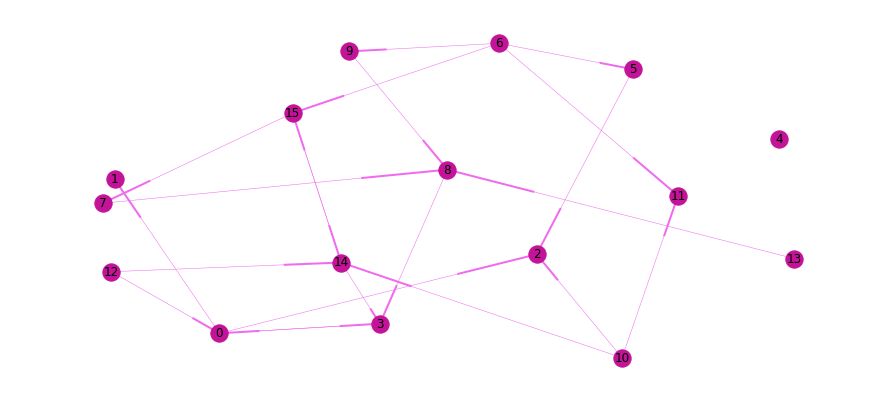

In [6]:
col_gen = ColorGenerator()
N, p = 16, 1/10
edges = random_graph(N, p)

plt.figure(figsize=(15,7))
G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_color=col_gen.get_color(), edge_color=col_gen.get_color())

Посчитаем его PageRank и изобразим так, чтобы размер вершины был пропорционален ее весу.

Возьмем в качестве начального распределения равномерное на всем множестве наших вершин

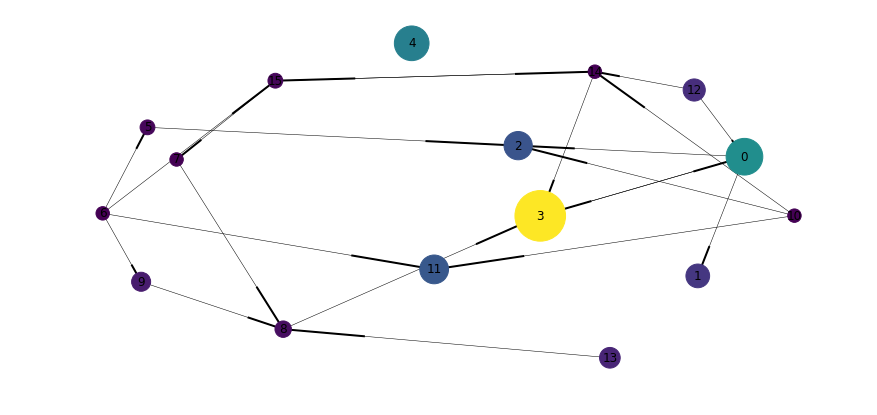

In [7]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.figure(figsize=(15,7))
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Как мы уже отмечали выше, эргодическая теорема дает верхнюю оценку на скорость сходимости. Давайте посмотрим, насколько она является точной. Для этого при вычислении PageRank нужно установить флаг return_trace.

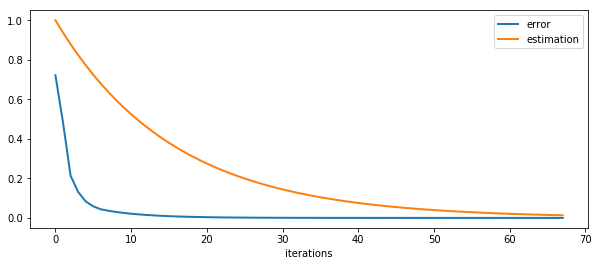

In [8]:
prob_matrix = create_page_rank_markov_chain(edges)
h = 1
delta = np.max([np.min(prob_matrix[i]) for i in range(len(prob_matrix))])
delta

pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))
plt.figure(figsize=(10,4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
plt.plot(x, (1 - delta) ** (np.floor(x / h)), lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

Как мы видим и вправду, наша оценка ограничивает сверху, но не очень точная, скорее всего, это происходит из-за того, что кол-во вершин не очень большое
_______________

А теперь взглянем, как вообще зависит число итераций до сходимости при разных числе вершин(n) и разных вероятностях появления ребра(p)

In [9]:
n_grid = np.arange(5, 40, 2)
p_grid = np.arange(0.2, 1., 0.05)
iter_nums = []
for n in tqdm(n_grid):
    to_push = []
    for p in p_grid:
        start_distribution = np.ones((1, n)) / n
        edges = random_graph(n, p)
        pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
        to_push.append(len(pr_trace))
    iter_nums.append(to_push)

100%|██████████| 18/18 [00:01<00:00, 16.74it/s]


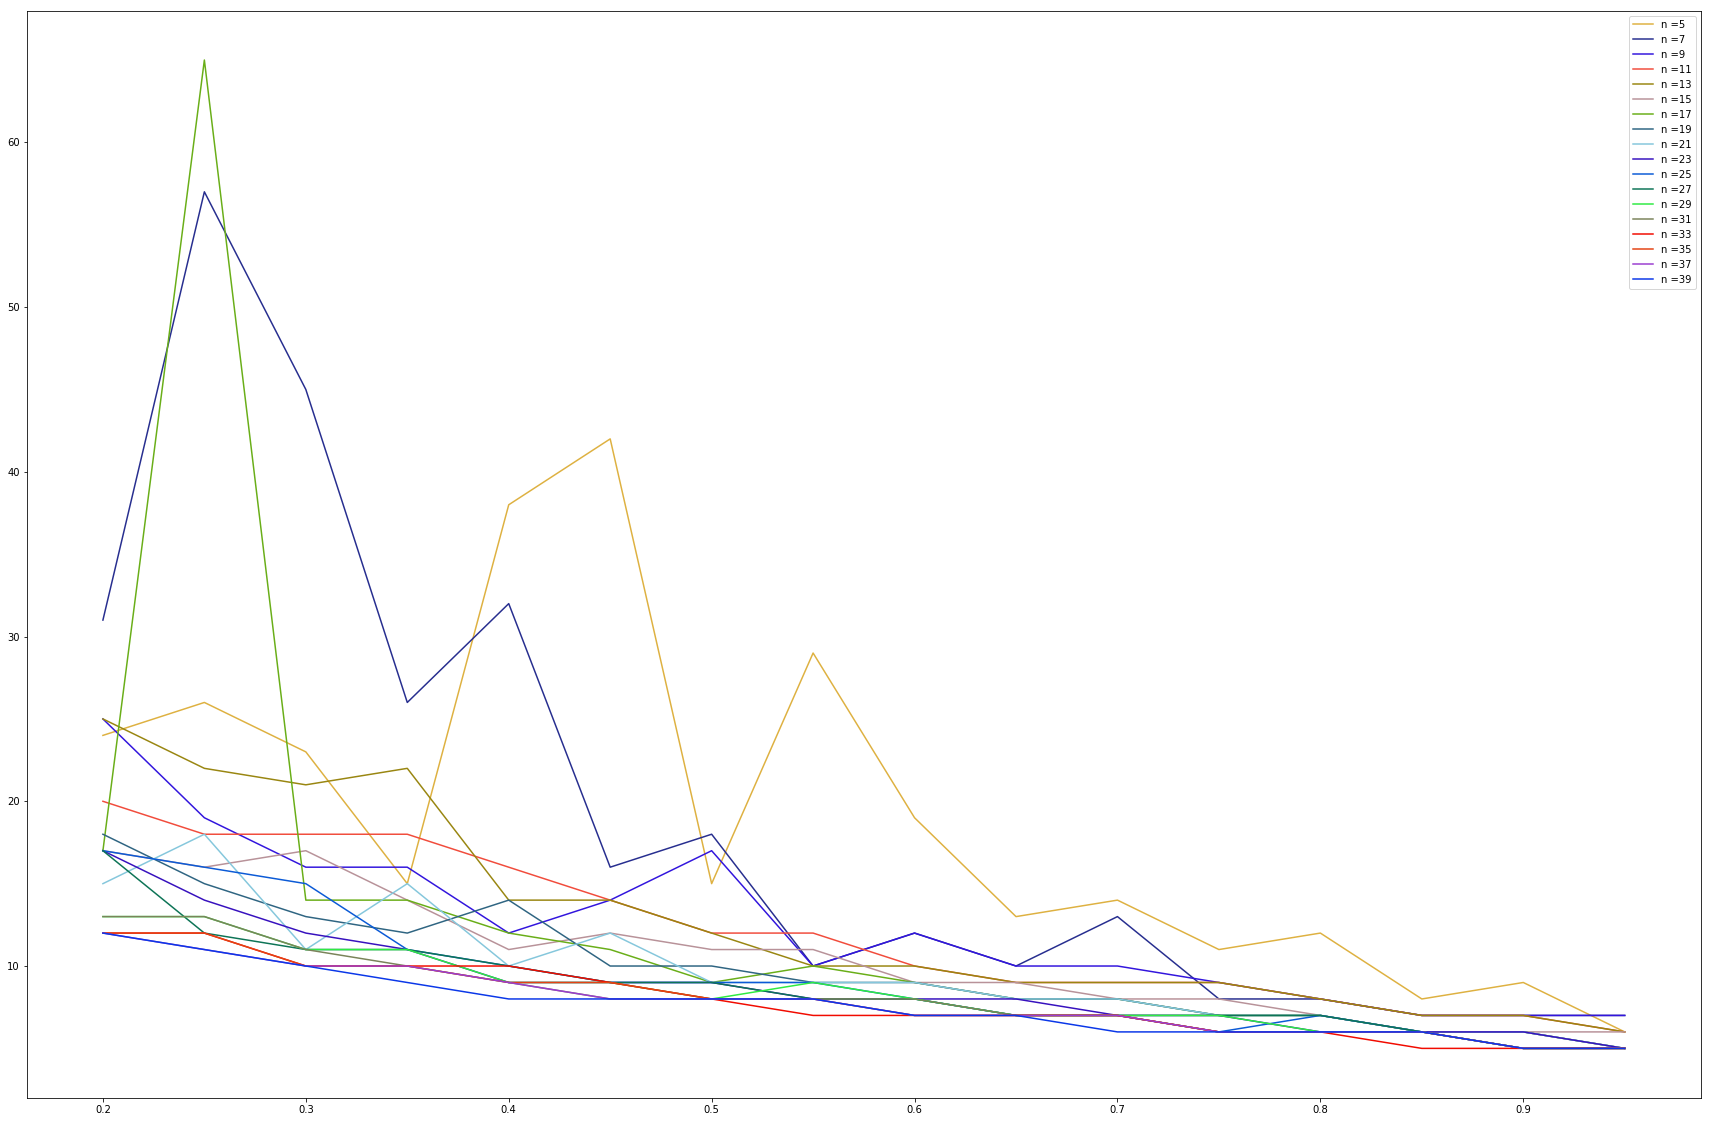

In [10]:
plt.figure(figsize=(30,20))
for i in range(len(iter_nums)):
    plt.plot(p_grid, iter_nums[i], color=col_gen.get_color(), label='n =' + str(n_grid[i]))
plt.legend()
plt.show()

## Часть 2 А теперь построим page_rank на реальных данных. Возьмем какой-нибудь сайт, пройдемся по ссылкам, которые есть на нем да посчитаем PageRank

In [11]:
from site_parser import load_links, get_site

In [12]:
from tqdm import tqdm

In [13]:
urls = ['http://wikipedia.org/wiki/']
site = get_site(urls[0])
links = []

N = 10
for i in tqdm(range(N)):
    try:
        links_from_url = load_links(urls[i], sleep_time=0.5)
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url)) #  будем ходить лишь по ссылкам с нашего сайта,
                                                      #  чтобы постараться уловить его структуру
        
        for j in range(len(links_from_url)):
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        print('Cannot get data from this urls, please retry or try another url')

 30%|███       | 3/10 [00:03<00:09,  1.41s/it]

Cannot get data from this urls, please retry or try another url


100%|██████████| 10/10 [00:13<00:00,  1.61s/it]


In [14]:
len(urls)

3036

In [120]:
N

10

 ### мы хотим, чтобы у нас отображалась информация лишь о первых N вершинах, то есть мы ходим по графу только в вершины от 1 до N 

In [121]:
filtered_results = list(filter(lambda x: x[0] < N and x[1] < N, links))

In [122]:
print(len(links), len(filtered_results))

6404 48


Изобразим полученный граф для главной страницы Википедии

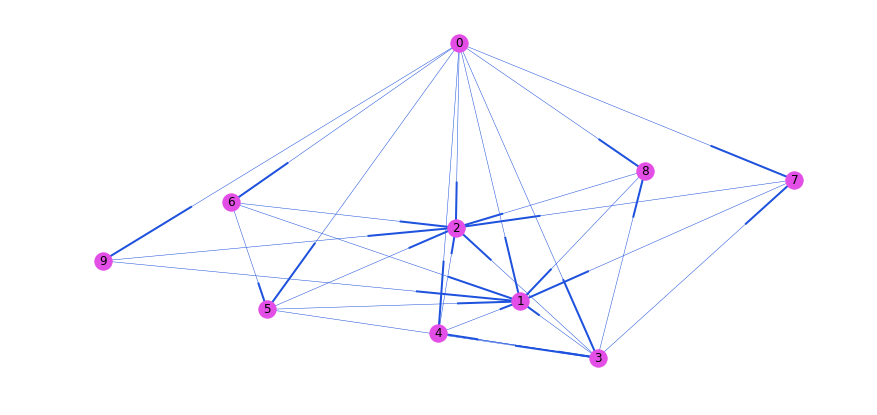

In [166]:
G_new = networkx.DiGraph()
G_new.add_edges_from(filtered_results)
plt.figure(figsize=(15,7))
plt.axis('off')
networkx.draw_networkx(G_new, width=0.5, node_color=col_gen.get_color(), edge_color=col_gen.get_color())

А теперь взглянем на граф, с подсчитанным page_rank

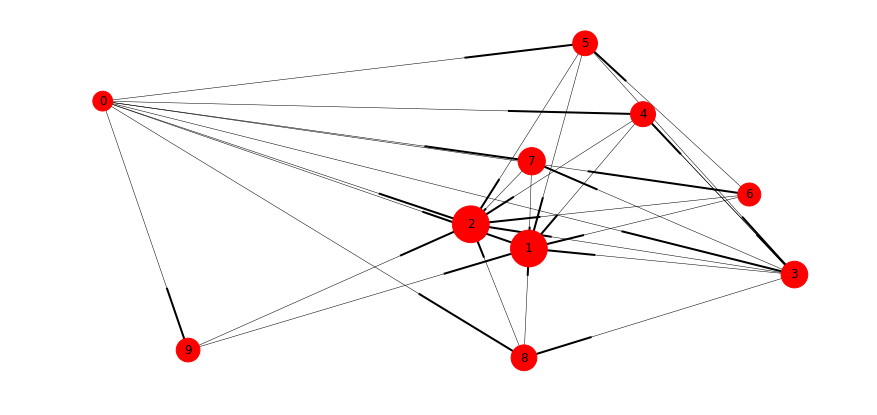

In [167]:

start_distribution = np.ones((1, 10)) / 10
pr_distribution = page_rank(filtered_results, start_distribution)

size_const = 10 ** 9.57
G = networkx.DiGraph()
G.add_edges_from(filtered_results)
plt.figure(figsize=(15,7))
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution)

In [ ]:
# urls = ['http://wikimipt.org/wiki/']
# site = get_site(urls[0])
# links = []

# curlen, lastlen, passed = 1,0, False
# while curlen != lastlen or passed:
#     try:
#         # Загружаем страницу по урлу и извлекаем из него все ссылки
#         # Не выставляйте sleep_time слишком маленьким, 
#         # а то еще забанят где-нибудь
#         links_from_url = load_links(urls[i], sleep_time=0.5)
#         # Если мы хотим переходить по ссылкам только определенного сайта
#         links_from_url = list(filter(lambda x: get_site(x) == site, 
#                                      links_from_url))
        
#         # Добавляем соответствующие вершины и ребра в веб-граф
#         for j in tqdm(range(len(links_from_url))):
#             # Такая ссылка уже есть
#             if links_from_url[j] in urls:
#                 links.append((i, urls.index(links_from_url[j])))
            
#             # Новая ссылка
#             else:
#                 links.append((i, len(urls)))
#                 urls.append(links_from_url[j])
    
#         passed = False

#     except:
#         passed = True
#         pass  # Не загрузилась с 5 попытки, ну и ладно

In [ ]:
# links_ru_discrete = links
# urls_ru_discrete = urls

In [145]:
urls = ['http://wikimipt.org/wiki/']

site = get_site(urls[0])
links = []

N = 50
for i in tqdm(range(N)):
    try:
        # Загружаем страницу по урлу и извлекаем из него все ссылки
        # Не выставляйте sleep_time слишком маленьким, 
        # а то еще забанят где-нибудь
        links_from_url = load_links(urls[i], sleep_time=0.5)
        # Если мы хотим переходить по ссылкам только определенного сайта
        links_from_url = list(filter(lambda x: get_site(x) == site, 
                                     links_from_url))
        
        # Добавляем соответствующие вершины и ребра в веб-граф
        for j in range(len(links_from_url)): 
            # Такая ссылка уже есть
            if links_from_url[j] in urls:
                links.append((i, urls.index(links_from_url[j])))
            
            # Новая ссылка
            else:
                links.append((i, len(urls)))
                urls.append(links_from_url[j])
                
    except:
        pass  # Не загрузилась с 5 попытки, ну и ладно

 78%|███████▊  | 39/50 [00:59<00:13,  1.26s/it]

'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)


 82%|████████▏ | 41/50 [01:01<00:09,  1.08s/it]

'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)
'ascii' codec can't encode characters in position 74-80: ordinal not in range(128)


100%|██████████| 50/50 [01:14<00:00,  1.51s/it]


In [146]:
links_wikimipt = links
urls_wikimipt = urls

In [147]:
len(set(links))

4799

In [148]:
len(set(links))

4799

In [149]:
len(links)

6220

In [150]:
links_unique = list(set(links))

In [198]:
# http://ru.starwars.wikia.com/wiki/Заглавная_страница  

linki = []
fiel = open('links_wukipedia.txt', 'r')
for line in fiel:
    linki.append(list(map(int,line.split())))

In [153]:
linki_filtered = list(filter(lambda x: x[0] < 50 and x[1] < 50,links_unique)) # Возьмем первые 50 вершин, чтобы было более-менее

In [154]:
len(linki_filtered)

358

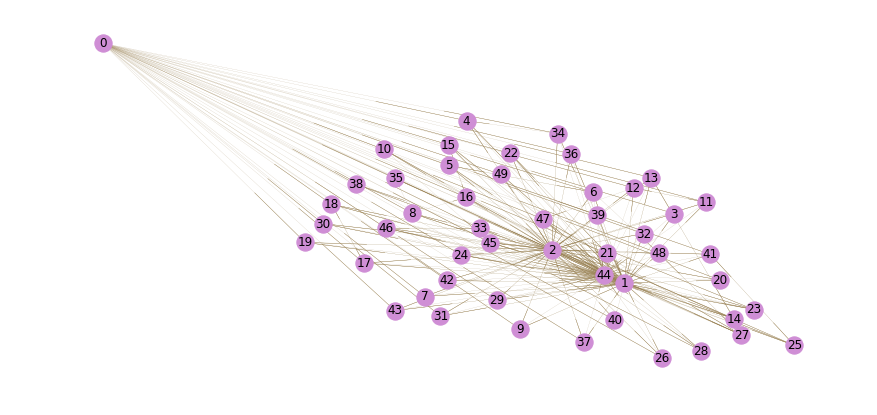

In [156]:
G_lf = networkx.DiGraph()
G_lf.add_edges_from(linki_filtered)
plt.figure(figsize=(15,7))
plt.axis('off')
networkx.draw_networkx(G_lf, width=0.1, node_color=col_gen.get_color(), edge_color=col_gen.get_color())

И теперь с подсчитанным PageRank

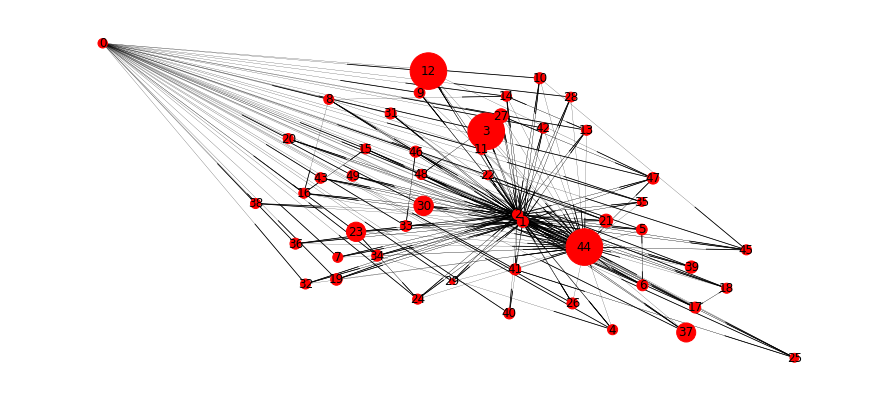

In [168]:

start_distribution = np.ones((1, 50)) / 50
pr_distribution = page_rank(linki_filtered, start_distribution)

size_const = 10 ** 4
G = networkx.DiGraph()
G.add_edges_from(linki_filtered)
plt.figure(figsize=(15,7))
plt.axis('off')
networkx.draw_networkx(G, width=0.2, node_size=size_const * pr_distribution)

#  Страницы, на которые часто ссылаются и будут иметь  больший вес

In [185]:
heaviest_vertices = list(reversed(np.argsort(pr_distribution)))[:10]
heaviest_vertices

[1, 44, 2, 47, 46, 45, 27, 33, 48, 14]

Выведем теперь соответсвующие этим вершинам веса

In [188]:
list(zip(heaviest_vertices, list(pr_distribution[heaviest_vertices])))

[(1, 0.13382452951290735),
 (44, 0.13382452951290735),
 (2, 0.13382452951290735),
 (47, 0.037788901722525164),
 (46, 0.037110069336862887),
 (45, 0.036268766699381172),
 (27, 0.019731027358636268),
 (33, 0.017204031665546102),
 (48, 0.014947361642474521),
 (14, 0.013268347226887847)]

In [189]:
top_10 = (list)(reversed(np.argsort(pr_distribution)))[:10]  # Топ 10 по вероятности
top_10 = set(top_10)
top_10

{1, 2, 14, 27, 33, 44, 45, 46, 47, 48}

In [191]:
induced = list(filter(lambda x: x[0] in top_10 and x[1] in top_10,linki)) # индуцируем граф, на самые топопвые вершины

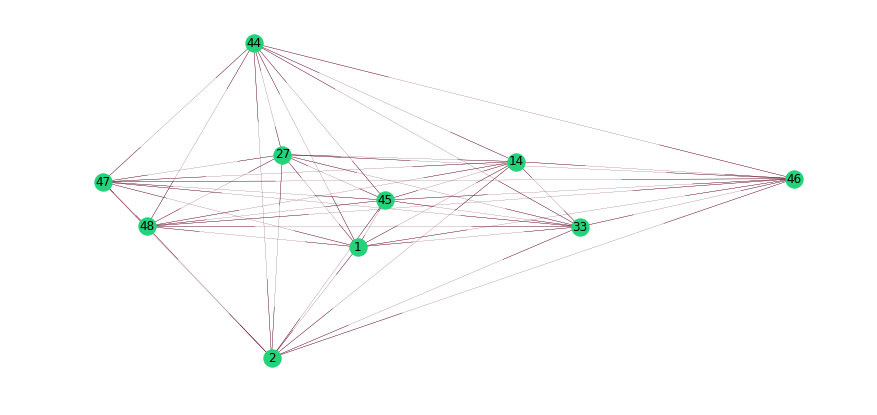

In [208]:
start_distribution = np.ones((1, 10)) / 10

size_const = 10 ** 4
G = networkx.DiGraph()
G.add_edges_from(induced)
plt.figure(figsize=(15,7))
plt.axis('off')
networkx.draw_networkx(G, width=0.1, node_color=col_gen.get_color(), edge_color=col_gen.get_color())

In [43]:
import sys

In [197]:
# Use pre-cached data

# fiel = open('links_wukipedia.txt', 'w+')
# for item in links_unique:
#     fiel.write("%s\n" % (str(item[0]) + " " + str(item[1])))